In [1]:
import pandas as pd
import numpy as np
import random
import pacmap
from sklearn.decomposition import PCA

from tasks.input import processInputFiles



Warning!  Failed to load collection 'prefect_dask': ModuleNotFoundError: No module named 'prefect.orion'


/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for deta

In [2]:
config = {
    "vcfLike": {
        "path": "../adhoc analysis/Variant_report_ALSoD_NYGC_ALS_and_1000_genomes_EUR_2021-12-15.xlsx",  # variant call table with annotations
        "sheet": "all cases vs all controls",  # sheet name if Excel spreadsheet
        "indexColumn": [
            "chrom",
            "position",
            "Gene",
        ],  # header that indexes variants (set as list with multiple columns)
        "geneMultiIndexLevel": 2,  # level of gene index in indexColumn
        "aggregateGenesBy": None,  # aggregate variants within genes by mean, sum, or meanFrequency. Set to None to disable.
        "compoundSampleIdDelimiter": "__",  # delimiter for compound sample IDs in column names
        "compoundSampleIdStartIndex": 1,  # index of genotype ID in compound sample ID
        "compoundSampleMetaIdStartIndex": 1,  # index of clinical ID in compound sample ID
        "binarize": False,  # binarize variants to 0/1, or sum to weigh allele frequency
        "minAlleleFrequency": 0.01,  # filter out variants with allele frequency less than this
        "maxVariants": 3000, # set max number of variants for control; set to None to disable
        # 'alleleModel': ['dominant', 'recessive', 'overDominant'],  # biallelic allele models to test on gene sets
        "filters": {},
    },  # TODO handle genotypes from related individuals
    "geneSets": {},  # TODO gene sets
    "tracking": {
        "name": "ALSoD genes",  # name of the experiment
        "entity": "ejmockler",
        "project": "ALS-ALSoD-gene-females-1MAF-test",
        "plotAllSampleImportances": True,  # if calculating Shapely explanations, plot each sample in Neptune
        "remote": False,  # if True, log to Neptune
    },
    "clinicalTable": {
        "path": "../adhoc analysis/ACWM.xlsx",  # clinical data as Excel spreadsheet
        "idColumn": "ExternalSampleId",  # genotype ID header
        "subjectIdColumn": "ExternalSubjectId",  # unique ID for each patient
        "labelColumn": "Subject Group",  # header that has case/control labels
        "controlLabels": [
            "Non-Neurological Control"
        ],  # these labels include external sample IDs (like 1000 Genomes)
        "caseLabels": ["ALS Spectrum MND"],  # "ALS Spectrum MND"
        "controlAlias": "control",
        "caseAlias": "case",
        "filters": "pct_european>=0.85",  # filter out nonhomogenous samples with less than 85% European ancestry
    },
    "externalTables": {
        "path": [
            "../adhoc analysis/igsr-1000 genomes phase 3 release.tsv",
        ],  # external sample table
        "label": [
            "control",
        ],  # case | control
        "setType": [
            "crossval",
        ],
        "idColumn": [
            "Sample name",
        ],  # sample ID header
        "filters": [
            "`Superpopulation code`=='EUR'",
        ],
    },
    "sampling": {
        "bootstrapIterations": 2,
        "crossValIterations": 3,  # number of validations per bootstrap iteration
        "holdoutSplit": 0.1,
        "lastIteration": 0,
        "sequesteredIDs": [],
    },
    "model": {
        "hyperparameterOptimization": True,
        "calculateShapelyExplanations": False,
    },
}


## Load filtered IDs 


In [3]:
genotypeData, filteredClinicalData = processInputFiles(config)

10:31:07.051 | INFO    | prefect.engine - Created flow run 'diligent-fulmar' for flow 'processInputFiles'

10:31:07.139 | INFO    | Flow run 'diligent-fulmar' - Created task run 'load-0' for task 'load'

10:31:07.140 | INFO    | Flow run 'diligent-fulmar' - Executing 'load-0' immediately...

10:32:01.766 | INFO    | Task run 'load-0' - Finished in state Completed()

10:32:01.780 | INFO    | Flow run 'diligent-fulmar' - Created task run 'filterTable-0' for task 'filterTable'

10:32:01.781 | INFO    | Flow run 'diligent-fulmar' - Executing 'filterTable-0' immediately...

10:32:01.810 | INFO    | Task run 'filterTable-0' - Filtering: pct_european>=0.85

10:32:01.830 | INFO    | Task run 'filterTable-0' - Finished in state Completed()

10:32:01.831 | INFO    | Flow run 'diligent-fulmar' - filtered 590 samples from clinical data

10:32:01.845 | INFO    | Flow run 'diligent-fulmar' - Created task run 'filterTable-1' for task 'filterTable'

10:32:01.846 | INFO    | Flow run 'diligent-fulmar' - Executing 'filterTable-1' immediately...

10:32:01.873 | INFO    | Task run 'filterTable-1' - Filtering: `Superpopulation code`=='EUR'

10:32:01.889 | INFO    | Task run 'filterTable-1' - Finished in state Completed()

10:32:01.890 | INFO    | Flow run 'diligent-fulmar' - filtered 4309 samples from external data ../adhoc analysis/igsr-1000 genomes phase 3 release.tsv

10:32:01.903 | INFO    | Flow run 'diligent-fulmar' - Created task run 'filterTable-2' for task 'filterTable'

10:32:01.904 | INFO    | Flow run 'diligent-fulmar' - Executing 'filterTable-2' immediately...

10:32:01.944 | INFO    | Task run 'filterTable-2' - Finished in state Completed()

10:32:01.945 | INFO    | Flow run 'diligent-fulmar' - filtered 0 variants from VCF

10:32:02.041 | INFO    | Flow run 'diligent-fulmar' - Created task run 'applyAlleleModel-1' for task 'applyAlleleModel'

10:32:02.042 | INFO    | Flow run 'diligent-fulmar' - Submitted task run 'applyAlleleModel-1' for execution.

10:32:02.051 | INFO    | Flow run 'diligent-fulmar' - Created task run 'applyAlleleModel-0' for task 'applyAlleleModel'

10:32:02.051 | INFO    | Flow run 'diligent-fulmar' - Submitted task run 'applyAlleleModel-0' for execution.

100%|██████████| 1024/1024 [01:19<00:00, 12.85id/s]


10:33:22.181 | INFO    | Task run 'applyAlleleModel-1' - Finished in state Completed()

100%|██████████| 2904/2904 [02:09<00:00, 22.39id/s]


10:34:12.106 | INFO    | Task run 'applyAlleleModel-0' - Finished in state Completed()

10:34:12.108 | INFO    | Flow run 'diligent-fulmar' - 
missing 854 case IDs:
 {'CGND-HDA-05530', 'CGND-HDA-04375', 'CGND-HDA-04631', 'CGND-HDA-04925', 'CGND-HDA-04485', 'CGND-HDA-03371', 'CGND-HDA-04415', 'CGND-HDA-04121', 'CGND-HDA-04434', 'CGND-HDA-03375', 'CGND-HDA-04327', 'CGND-HDA-04527', 'CGND-HDA-04583', 'CGND-HDA-05290', 'CGND-HDA-04342', 'CGND-HDA-04243', 'CGND-HDA-04480', 'CGND-HDA-04311', 'CGND-HDA-04298', 'CGND-HDA-04559', 'CGND-HDA-04156', 'CGND-HDA-04391', 'CGND-HDA-04675', 'CGND-HDA-04141', 'CGND-HDA-04337', 'CGND-HDA-04302', 'CGND-HDA-04897', 'CGND-HDA-04272', 'CGND-HDA-04427', 'CGND-HDA-04422', 'CGND-HDA-04898', 'CGND-HDA-04218', 'CGND-HDA-04414', 'CGND-HDA-04739', 'CGND-HDA-04622', 'CGND-HDA-04773', 'CGND-HDA-03361', 'CGND-HDA-04266', 'CGND-HDA-04109', 'CGND-HDA-04918', 'CGND-HDA-04610', 'CGND-HDA-04416', 'CGND-HDA-04180', 'CGND-HDA-04947', 'CGND-HDA-04420', 'CGND-HDA-00945', 'CGND-HDA-04127', 'CGND-HDA-04961', 'CGND-HDA-04462', 'CGND-HDA-04869', 'CGND-HDA-04891', 'CGND-HDA-04608', 'CGND-HDA-03129', 'CGND-HDA-03108', 'CGND-HDA-04538', 'CGND-HDA-04725', 'CGND-HDA-05555', 'CGND-HDA-04903', 'CGND-HDA-04257', 'CGND-HDA-04457', 'CGND-HDA-04221', 'CGND-HDA-04875', 'CGND-HDA-04239', 'CGND-HDA-04293', 'CGND-HDA-04621', 'CGND-HDA-04792', 'CGND-HDA-04784', 'CGND-HDA-04873', 'CGND-HDA-03122', 'CGND-HDA-04497', 'CGND-HDA-04362', 'CGND-HDA-04519', 'CGND-HDA-05551', 'CGND-HDA-04603', 'CGND-HDA-04305', 'CGND-HDA-05550', 'CGND-HDA-04620', 'CGND-HDA-04611', 'CGND-HDA-04662', 'CGND-HDA-04499', 'CGND-HDA-04163', 'CGND-HDA-04597', 'CGND-HDA-02861', 'CGND-HDA-04926', 'CGND-HDA-04774', 'CGND-HDA-04146', 'CGND-HDA-03107', 'CGND-HDA-03112', 'CGND-HDA-04341', 'CGND-HDA-00758', 'CGND-HDA-04592', 'CGND-HDA-03365', 'CGND-HDA-04683', 'CGND-HDA-04596', 'CGND-HDA-04944', 'CGND-HDA-03363', 'CGND-HDA-04579', 'CGND-HDA-04197', 'CGND-HDA-04865', 'CGND-HDA-04701', 'CGND-HDA-05513', 'CGND-HDA-04643', 'CGND-HDA-04565', 'CGND-HDA-01366', 'CGND-HDA-01135', 'CGND-HDA-04377', 'CGND-HDA-05297', 'CGND-HDA-04238', 'CGND-HDA-02889', 'CGND-HDA-01495', 'CGND-HDA-04642', 'CGND-HDA-04130', 'CGND-HDA-04147', 'CGND-HDA-04800', 'CGND-HDA-05549', 'CGND-HDA-04282', 'CGND-HDA-05533', 'CGND-HDA-04949', 'CGND-HDA-04532', 'CGND-HDA-02892', 'CGND-HDA-04347', 'CGND-HDA-04223', 'CGND-HDA-04395', 'CGND-HDA-04123', 'CGND-HDA-04444', 'CGND-HDA-04329', 'CGND-HDA-04737', 'CGND-HDA-04908', 'CGND-HDA-04534', 'CGND-HDA-04874', 'CGND-HDA-02043', 'CGND-HDA-04317', 'CGND-HDA-04472', 'CGND-HDA-04738', 'CGND-HDA-05307', 'CGND-HDA-04671', 'CGND-HDA-04716', 'CGND-HDA-04155', 'CGND-HDA-04338', 'CGND-HDA-04213', 'CGND-HDA-01189', 'CGND-HDA-04920', 'CGND-HDA-04521', 'CGND-HDA-03114', 'CGND-HDA-02896', 'CGND-HDA-04438', 'CGND-HDA-04867', 'CGND-HDA-04600', 'CGND-HDA-03303', 'CGND-HDA-03110', 'CGND-HDA-04857', 'CGND-HDA-04950', 'CGND-HDA-05304', 'CGND-HDA-04351', 'CGND-HDA-04451', 'CGND-HDA-04106', 'CGND-HDA-04536', 'CGND-HDA-04136', 'CGND-HDA-03349', 'CGND-HDA-04418', 'CGND-HDA-01301', 'CGND-HDA-05539', 'CGND-HDA-04554', 'CGND-HDA-03118', 'CGND-HDA-04421', 'CGND-HDA-04252', 'CGND-HDA-04112', 'CGND-HDA-04432-2', 'CGND-HDA-03299', 'CGND-HDA-04468', 'CGND-HDA-04636', 'CGND-HDA-04390', 'CGND-HDA-03333', 'CGND-HDA-05497', 'CGND-HDA-04623', 'CGND-HDA-04105', 'CGND-HDA-04878', 'CGND-HDA-03343', 'CGND-HDA-03123', 'CGND-HDA-04507', 'CGND-HDA-00172', 'CGND-HDA-01362', 'CGND-HDA-03119', 'CGND-HDA-04626', 'CGND-HDA-04557', 'CGND-HDA-04558', 'CGND-HDA-04449', 'CGND-HDA-04132', 'CGND-HDA-04456', 'CGND-HDA-04938', 'CGND-HDA-04295', 'CGND-HDA-03322', 'CGND-HDA-04124', 'CGND-HDA-04587', 'CGND-HDA-04339', 'CGND-HDA-04594', 'CGND-HDA-04605', 'CGND-HDA-04417', 'CGND-HDA-03367', 'CGND-HDA-04262', 'CGND-HDA-05538', 'CGND-HDA-04492', 'CGND-HDA-04117', 'CGND-HDA-04871', 'CGND-HDA-04135', 'CGND-HDA-04176', 'CGND-HDA-04394', 'CGND-HDA-04290', 'CGND-HDA-04667', 'CGND-HDA-04355', 'CGND-HDA-04349', 'CGND-HDA-04771', 'CGND-HDA-05302', 'CGND-HDA-04215', 'CGND-HDA-04138', 'CGND-HDA-04371', 'CGND-HDA-04157', 'CGND-HDA-031

10:34:12.110 | INFO    | Flow run 'diligent-fulmar' - 
missing 243 control IDs:
 {'HG02237', 'HG04303', 'CGND-HDA-02876', 'NA12740', 'NA10831', 'CGND-HDA-00167', 'NA12892', 'HG01532', 'CGND-HDA-04828', 'NA07022', 'HG01769', 'HG01671', 'NA10855', 'CGND-HDA-02870', 'NA10857', 'CGND-HDA-03173', 'HG01621', 'CGND-HDA-02489-1', 'CGND-HDA-03170', 'NA07034', 'HG00147', 'HG01787', 'NA12274', 'CGND-HDA-03318', 'HG02234', 'CGND-HDA-02880', 'NA07435', 'HG01701', 'CGND-HDA-02891', 'NA11891', 'CGND-HDA-02736', 'NA06993', 'HG00303', 'NA12767', 'NA06997', 'HG01629', 'NA12057', 'NA10839', 'HG00134', 'HG01674', 'NA07348', 'CGND-HDA-04830', 'NA11839', 'HG01681', 'CGND-HDA-00166', 'CGND-HDA-05298', 'NA10830', 'NA12752', 'NA12864', 'HG01614', 'CGND-HDA-04749', 'CGND-HDA-02884', 'HG01633', 'HG01782', 'HG01622', 'NA07055', 'HG01772', 'HG01755', 'CGND-HDA-03184', 'NA10859', 'NA10860', 'CGND-HDA-02863', 'HG01764', 'NA20816', 'NA12546', 'CGND-HDA-01167', 'CGND-HDA-03294', 'NA12329', 'CGND-HDA-03326', 'NA07019', 'CGND-HDA-04733', 'CGND-HDA-02869', 'HG01687', 'HG01517', 'CGND-HDA-04835', 'CGND-HDA-04834', 'NA10861', 'HG01698', 'CGND-HDA-03175', 'NA10840', 'CGND-HDA-02752', 'CGND-HDA-04923', 'HG02229', 'NA12146', 'HG00377', 'NA07349', 'NA10854', 'CGND-HDA-04734', 'HG00152', 'CGND-HDA-02865', 'CGND-HDA-03369', 'HG01611', 'CGND-HDA-00214', 'HG01616', 'HG04301', 'CGND-HDA-02868', 'NA11882', 'NA12817', 'CGND-HDA-04848', 'NA10850', 'NA10856', 'NA10838', 'NA10846', 'HG01523', 'NA06995', 'NA12145', 'HG00135', 'HG02240', 'HG01780', 'NA10835', 'CGND-HDA-03325', 'CGND-HDA-03356', 'NA12386', 'NA10864', 'NA12375', 'CGND-HDA-03177', 'NA12707', 'NA12485', 'HG01508', 'HG01538', 'NA12802', 'CGND-HDA-03164', 'NA12335', 'HG00124', 'HG00247', 'CGND-HDA-04849', 'NA12830', 'NA12739', 'CGND-HDA-03297', 'CGND-HDA-03163', 'HG01711', 'NA12818', 'CGND-HDA-04735', 'CGND-HDA-03183', 'NA20526', 'HG01502', 'CGND-HDA-03171', 'CGND-HDA-02867', 'HG01703', 'NA12865', 'NA12708', 'NA12832', 'CGND-HDA-04824', 'CGND-HDA-03185', 'CGND-HDA-04922', 'HG00098', 'CGND-HDA-00216', 'CGND-HDA-04736', 'HG01511', 'NA12753', 'HG01609', 'NA12336', 'NA12236', 'CGND-HDA-00165', 'CGND-HDA-03182', 'NA07340', 'NA20831', 'HG00359', 'NA10842', 'CGND-HDA-03174', 'NA12248', 'CGND-HDA-03169', 'CGND-HDA-00179', 'HG01696', 'NA10837', 'HG01505', 'CGND-HDA-03168', 'NA07345', 'CGND-HDA-02887', 'CGND-HDA-05299', 'NA12877', 'CGND-HDA-00178', 'HG01514', 'CGND-HDA-05300', 'NA10843', 'HG01677', 'CGND-HDA-03179', 'HG00302', 'NA10836', 'NA07346', 'HG02218', 'NA20829', 'HG00249', 'HG01706', 'CGND-HDA-05535', 'CGND-HDA-04846', 'HG00156', 'CGND-HDA-04894', 'NA06991', 'NA11917', 'HG01520', 'NA11993', 'NA10865', 'CGND-HDA-02883', 'HG04302', 'NA20537', 'HG01601', 'CGND-HDA-03172', 'HG00153', 'HG00104', 'HG01748', 'NA12239', 'NA12891', 'NA12343', 'HG02225', 'HG02217', 'HG00144', 'HG02222', 'NA10853', 'NA12801', 'NA12376', 'CGND-HDA-04825', 'HG01683', 'HG01529', 'HG01526', 'NA12875', 'CGND-HDA-02837', 'CGND-HDA-04889', 'CGND-HDA-04822', 'HG01763', 'HG00270', 'CGND-HDA-02878', 'HG01774', 'HG01667', 'NA07045', 'NA12344', 'HG01778', 'NA10863', 'HG00248', 'NA07031', 'HG00312', 'NA12766', 'NA10852', 'HG01604', 'CGND-HDA-00180', 'NA12056', 'CGND-HDA-00217', 'NA12264', 'CGND-HDA-03398', 'NA07014', 'NA07029', 'NA10845', 'HG01627'}

10:34:18.172 | INFO    | Flow run 'diligent-fulmar' - Filtered 134 alleles with frequency below 1.000%

10:34:18.173 | INFO    | Flow run 'diligent-fulmar' - Kept 1944 alleles

10:34:24.407 | INFO    | Flow run 'diligent-fulmar' - 
2050 cases:
 {'CGND-HDA-01042', 'CGND-HDA-02938', 'CGND-HDA-00316', 'CGND-HDA-01318', 'CGND-HDA-02036', 'CGND-HDA-02655', 'CGND-HDA-02266', 'CGND-HDA-00243', 'CGND-HDA-02588', 'CGND-HDA-02320', 'CGND-HDA-01808', 'CGND-HDA-00813', 'CGND-HDA-03594', 'CGND-HDA-02603', 'CGND-HDA-02569', 'CGND-HDA-00515', 'CGND-HDA-03482', 'CGND-HDA-03485', 'CGND-HDA-03042', 'CGND-HDA-00354', 'CGND-HDA-00726', 'CGND-HDA-02907', 'CGND-HDA-00248', 'CGND-HDA-01151', 'CGND-HDA-01897', 'CGND-HDA-00965', 'CGND-HDA-01047', 'CGND-HDA-03889', 'CGND-HDA-00959', 'CGND-HDA-02424', 'CGND-HDA-01196', 'CGND-HDA-00695', 'CGND-HDA-03820', 'CGND-HDA-01355', 'CGND-HDA-00889', 'CGND-HDA-00284', 'CGND-HDA-03511', 'CGND-HDA-02104', 'CGND-HDA-03450', 'CGND-HDA-01168', 'CGND-HDA-00312', 'CGND-HDA-00571', 'CGND-HDA-02253', 'CGND-HDA-00881', 'CGND-HDA-00240', 'CGND-HDA-01860', 'CGND-HDA-01574', 'CGND-HDA-00263', 'CGND-HDA-00801', 'CGND-HDA-00076', 'CGND-HDA-01279', 'CGND-HDA-03463', 'CGND-HDA-00790', 'CGND-HDA-00682', 'CGND-HDA-03843', 'CGND-HDA-00331', 'CGND-HDA-01263', 'CGND-HDA-00574', 'CGND-HDA-03873', 'CGND-HDA-03566', 'CGND-HDA-00101', 'CGND-HDA-03605', 'CGND-HDA-02466', 'CGND-HDA-03565', 'CGND-HDA-02267', 'CGND-HDA-02920', 'CGND-HDA-01839', 'CGND-HDA-03553', 'CGND-HDA-03549', 'CGND-HDA-02087', 'CGND-HDA-02322', 'CGND-HDA-00729', 'CGND-HDA-01480', 'CGND-HDA-03200', 'CGND-HDA-00766', 'CGND-HDA-01823', 'CGND-HDA-00925', 'CGND-HDA-00884', 'CGND-HDA-02941', 'CGND-HDA-00796', 'CGND-HDA-03649', 'CGND-HDA-03014', 'CGND-HDA-01398', 'CGND-HDA-02373', 'CGND-HDA-02634', 'CGND-HDA-02456', 'CGND-HDA-00693', 'CGND-HDA-01349', 'CGND-HDA-01008', 'CGND-HDA-03641', 'CGND-HDA-03904', 'CGND-HDA-03677', 'CGND-HDA-01461', 'CGND-HDA-02351', 'CGND-HDA-02262', 'CGND-HDA-00780', 'CGND-HDA-02228', 'CGND-HDA-02145', 'CGND-HDA-00775', 'CGND-HDA-01590', 'CGND-HDA-00817', 'CGND-HDA-03052', 'CGND-HDA-01509', 'CGND-HDA-02254', 'CGND-HDA-03814', 'CGND-HDA-03055', 'CGND-HDA-00567', 'CGND-HDA-00507', 'CGND-HDA-00309', 'CGND-HDA-02058', 'CGND-HDA-02598', 'CGND-HDA-03871', 'CGND-HDA-01738', 'CGND-HDA-02958', 'CGND-HDA-01446', 'CGND-HDA-01154', 'CGND-HDA-03083', 'CGND-HDA-02389', 'CGND-HDA-02197', 'CGND-HDA-03915', 'CGND-HDA-00476', 'CGND-HDA-00206', 'CGND-HDA-02623', 'CGND-HDA-03139', 'CGND-HDA-02885', 'CGND-HDA-02698', 'CGND-HDA-00276', 'CGND-HDA-00909', 'CGND-HDA-00799', 'CGND-HDA-00827', 'CGND-HDA-02978', 'CGND-HDA-01728', 'CGND-HDA-02506', 'CGND-HDA-00764', 'CGND-HDA-01032', 'CGND-HDA-02199', 'CGND-HDA-00523', 'CGND-HDA-00655', 'CGND-HDA-01076', 'CGND-HDA-02193', 'CGND-HDA-00678', 'CGND-HDA-03503', 'CGND-HDA-02775', 'CGND-HDA-01704', 'CGND-HDA-04060', 'CGND-HDA-00871', 'CGND-HDA-02118', 'CGND-HDA-03480', 'CGND-HDA-00278', 'CGND-HDA-02297', 'CGND-HDA-00893', 'CGND-HDA-00935', 'CGND-HDA-00896', 'CGND-HDA-00527', 'CGND-HDA-02249', 'CGND-HDA-02573', 'CGND-HDA-03403', 'CGND-HDA-01109', 'CGND-HDA-02305', 'CGND-HDA-04039', 'CGND-HDA-00333', 'CGND-HDA-00748', 'CGND-HDA-03554', 'CGND-HDA-03719', 'CGND-HDA-01300', 'CGND-HDA-00360', 'CGND-HDA-02921', 'CGND-HDA-02773', 'CGND-HDA-00777', 'CGND-HDA-01395', 'CGND-HDA-03924', 'CGND-HDA-03433', 'CGND-HDA-01769', 'CGND-HDA-02618', 'CGND-HDA-00663', 'CGND-HDA-00569', 'CGND-HDA-00491', 'CGND-HDA-02939', 'CGND-HDA-01344', 'CGND-HDA-01104', 'CGND-HDA-00256', 'CGND-HDA-04077', 'CGND-HDA-00675', 'CGND-HDA-02224', 'CGND-HDA-01858', 'CGND-HDA-03835', 'CGND-HDA-01444', 'CGND-HDA-00923', 'CGND-HDA-00026', 'CGND-HDA-03665', 'CGND-HDA-04081', 'CGND-HDA-03880', 'CGND-HDA-03047', 'CGND-HDA-02642', 'CGND-HDA-03533', 'CGND-HDA-00488', 'CGND-HDA-01794', 'CGND-HDA-03857', 'CGND-HDA-02350', 'CGND-HDA-03997', 'CGND-HDA-01396', 'CGND-HDA-01380', 'CGND-HDA-01198', 'CGND-HDA-01696', 'CGND-HDA-01146', 'CGND-HDA-03466', 'CGND-HDA-01688', 'CGND-HDA-01705', 'CGND-HDA-01796', 'CGND-HDA-02860', 'CGND-HDA-02433', 'CGND-HDA-02065', 'CGND-HDA-01265', 'CGND-HDA-02614', 'CGND-HDA-03492', 'CGND-HDA-03673', 'CGND-HDA-02668', 'CGND-HDA-04036', 'CGND-H

10:34:24.412 | INFO    | Flow run 'diligent-fulmar' - 
781 controls:
 {'HG00368', 'NA11918', 'CGND-HDA-01551', 'CGND-HDA-02838', 'CGND-HDA-00565', 'HG00097', 'NA20589', 'CGND-HDA-03781', 'CGND-HDA-03093', 'NA20753', 'HG00267', 'NA12749', 'HG01334', 'CGND-HDA-00260', 'HG00174', 'CGND-HDA-01691', 'CGND-HDA-01640', 'CGND-HDA-03545', 'CGND-HDA-01532', 'HG02235', 'CGND-HDA-01655', 'HG00372', 'HG01747', 'NA12873', 'HG01673', 'CGND-HDA-03951', 'CGND-HDA-02514', 'NA11894', 'HG01516', 'HG00367', 'HG00243', 'HG01694', 'NA12874', 'NA20582', 'HG01679', 'NA20532', 'HG00100', 'CGND-HDA-03683', 'CGND-HDA-03788', 'CGND-HDA-03801', 'CGND-HDA-01852', 'NA20765', 'CGND-HDA-03597', 'NA20815', 'HG01791', 'CGND-HDA-01417', 'CGND-HDA-02519', 'CGND-HDA-03448', 'HG01623', 'CGND-HDA-01484', 'HG02223', 'HG00127', 'CGND-HDA-03520', 'NA20827', 'HG01695', 'HG00232', 'HG01506', 'CGND-HDA-03144', 'CGND-HDA-02762', 'HG00121', 'HG00310', 'CGND-HDA-02724', 'CGND-HDA-03074', 'NA20758', 'CGND-HDA-01900', 'HG00118', 'NA20819', 'HG01527', 'CGND-HDA-03562', 'NA11992', 'HG00180', 'CGND-HDA-00435', 'HG00357', 'HG00353', 'CGND-HDA-02021', 'NA07000', 'HG00178', 'NA11932', 'CGND-HDA-01608', 'HG00188', 'HG01610', 'HG00112', 'NA12778', 'HG00313', 'NA20771', 'NA20774', 'CGND-HDA-02189', 'CGND-HDA-01500', 'HG01625', 'CGND-HDA-02513', 'HG00311', 'NA12413', 'HG01790', 'NA12763', 'CGND-HDA-02222', 'CGND-HDA-03782', 'HG00096', 'HG00329', 'NA20522', 'HG02220', 'HG00269', 'NA20764', 'HG01619', 'HG01530', 'CGND-HDA-01427', 'HG00182', 'HG00245', 'NA11831', 'CGND-HDA-01653', 'HG00259', 'NA20809', 'CGND-HDA-02831', 'HG00237', 'NA20797', 'CGND-HDA-00434', 'HG02236', 'HG00139', 'CGND-HDA-03977', 'HG00187', 'NA12046', 'CGND-HDA-03774', 'CGND-HDA-01438', 'CGND-HDA-03739', 'CGND-HDA-01488', 'CGND-HDA-02510', 'HG00271', 'HG01620', 'CGND-HDA-01501', 'NA12761', 'CGND-HDA-01536', 'HG00246', 'HG00233', 'HG00381', 'CGND-HDA-03095', 'HG00280', 'CGND-HDA-02772', 'CGND-HDA-03081', 'CGND-HDA-02728', 'CGND-HDA-03794', 'HG00365', 'HG00158', 'CGND-HDA-02714', 'CGND-HDA-02081', 'CGND-HDA-01413', 'HG00341', 'CGND-HDA-01606', 'CGND-HDA-02750', 'CGND-HDA-03770', 'NA06984', 'NA20807', 'HG00285', 'NA20539', 'CGND-HDA-03411', 'CGND-HDA-01654', 'CGND-HDA-01433', 'HG01775', 'CGND-HDA-02088', 'NA20754', 'NA20814', 'HG01700', 'HG01630', 'NA12154', 'CGND-HDA-03479', 'NA20822', 'HG00355', 'CGND-HDA-02075', 'CGND-HDA-02716', 'HG01684', 'NA20756', 'NA12347', 'CGND-HDA-03813', 'CGND-HDA-03147', 'HG01680', 'CGND-HDA-03524', 'CGND-HDA-02720', 'NA11931', 'NA20795', 'NA12383', 'HG01776', 'CGND-HDA-03870', 'CGND-HDA-03468', 'HG00343', 'HG00160', 'NA20821', 'HG00114', 'CGND-HDA-00564', 'NA12760', 'HG01762', 'HG01699', 'NA12004', 'HG02233', 'HG00277', 'CGND-HDA-02722', 'CGND-HDA-02515', 'CGND-HDA-01865', 'CGND-HDA-01533', 'CGND-HDA-03584', 'HG00263', 'CGND-HDA-02567', 'NA20503', 'CGND-HDA-01593', 'HG01607', 'NA20828', 'CGND-HDA-03858', 'HG00186', 'HG01697', 'HG01602', 'HG01789', 'CGND-HDA-01020', 'HG00327', 'HG00154', 'HG00157', 'NA20581', 'CGND-HDA-02857', 'CGND-HDA-03157', 'CGND-HDA-01519', 'HG00251', 'CGND-HDA-01456', 'HG00101', 'NA20527', 'CGND-HDA-03950', 'NA12342', 'HG00261', 'NA12748', 'NA20510', 'NA20785', 'HG01613', 'HG00149', 'CGND-HDA-03896', 'HG00183', 'NA20810', 'NA20538', 'NA20520', 'NA20778', 'HG01669', 'CGND-HDA-03811', 'CGND-HDA-00209', 'HG01603', 'HG01626', 'NA20533', 'NA12775', 'CGND-HDA-03689', 'HG01686', 'NA12045', 'HG00336', 'HG00113', 'CGND-HDA-03783', 'CGND-HDA-03522', 'CGND-HDA-03084', 'HG00264', 'HG00272', 'HG00122', 'CGND-HDA-01830', 'NA20804', 'NA20535', 'HG00276', 'HG01707', 'CGND-HDA-03089', 'NA20803', 'CGND-HDA-03457', 'HG01628', 'CGND-HDA-01953', 'CGND-HDA-01453', 'CGND-HDA-01464', 'CGND-HDA-01414', 'HG00306', 'HG00378', 'HG01668', 'NA20759', 'NA20514', 'CGND-HDA-03698', 'CGND-HDA-01641', 'CGND-HDA-01486', 'HG00181', 'HG01500', 'NA06994', 'HG00278', 'HG01615', 'HG00371', 'NA20502', 'NA11994', 'HG00239', 'CGND-HDA-03797', 'CGND-HDA-03097', 'CGND-HDA-03079', 'CGND-HDA-01853', 'HG00325', 'HG00146'

10:34:24.686 | INFO    | Flow run 'diligent-fulmar' - Finished in state Completed()

In [4]:
caseGenotypes = genotypeData.case.genotype
controlGenotypes = genotypeData.control.genotype

## Load genotype sets

In [82]:
pd.read_excel("../adhoc analysis/Variant_report_NUPs_fixed_2022-03-28.xlsx", sheet_name="all cases vs all controls").columns

In [83]:
geneSetGenotypesPaths = {
    'cardiac': "../adhoc analysis/cardiacGenotypes.csv", 
    'alsod': "../adhoc analysis/alsodGenotypes.csv",
    'NUPs': "../adhoc analysis/NUPsGenotypes.csv"
}

In [112]:
import pandas as pd
import random

# Initialization
geneSetGenotypeDataframes = {}
negativeControlDataframes = {}
common_case_ids = set()
common_control_ids = set()
initialized_common_ids = False

# Iterate over gene sets
for name in geneSetGenotypesPaths:

    # Load data
    geneSetData = pd.read_csv(geneSetGenotypesPaths[name], sep='\t', index_col=['chrom', 'position', 'Gene'], engine="pyarrow")

    # Resolve IDs
    resolvedCaseIDs = [genotypeID for genotypeID in geneSetData.columns.tolist() 
                       if any(substr in genotypeID for sampleID in caseGenotypes.columns 
                              for substr in sampleID.split(config['vcfLike']['compoundSampleIdDelimiter']) if len(substr) > 3)]
    
    resolvedControlIDs = [genotypeID for genotypeID in geneSetData.columns.tolist() 
                          if any(substr in genotypeID for sampleID in controlGenotypes.columns 
                                 for substr in sampleID.split(config['vcfLike']['compoundSampleIdDelimiter']) if len(substr) > 3)]


    # On first iteration, initialize common_case_ids and common_control_ids
    if not initialized_common_ids:
        common_case_ids = set(resolvedCaseIDs)
        common_control_ids = set(resolvedControlIDs)
        initialized_common_ids = True
    else:
        # Find intersection of IDs with common IDs
        common_case_ids &= set(resolvedCaseIDs)
        common_control_ids &= set(resolvedControlIDs)

# Convert sets to lists
common_case_ids = list(common_case_ids)
common_control_ids = list(common_control_ids)

# Find the minimum sample size across the two groups and use it to balance the data
min_sample_size = min(len(common_case_ids), len(common_control_ids))

# Balance the IDs
balanced_common_case_ids = list(set(random.sample(common_case_ids, min_sample_size)))
balanced_common_control_ids = list(set(random.sample(common_control_ids, min_sample_size)))

for name in geneSetGenotypesPaths:
    geneSetData = pd.read_csv(geneSetGenotypesPaths[name], sep='\t', index_col=['chrom', 'position', 'Gene'], engine="pyarrow")

    # Select common balanced case and control IDs
    selected_cases = geneSetData.loc[:, balanced_common_case_ids]
    selected_controls = geneSetData.loc[:, balanced_common_control_ids]

    # Concatenate balanced cases and controls
    balanced_data = pd.concat([selected_cases, selected_controls], axis=1)

    # Remove invariant features
    num_features_before = balanced_data.shape[0]
    balanced_data = balanced_data.loc[balanced_data.std(axis=1) > 0]
    num_features_after = balanced_data.shape[0]
    num_features_removed = num_features_before - num_features_after

    # Assign to result dictionary
    geneSetGenotypeDataframes[name] = balanced_data.dropna()

    # Generate negative control by permuting variants along the row index
    scrambled_data = geneSetGenotypeDataframes[name].apply(np.random.permutation, axis=0)
    negativeControlDataframes[name] = scrambled_data

    # Print number of invariant features removed
    print(f"For {name}, {num_features_removed} invariant features were removed.")

# Print summary
print(f"Number of balanced cases: {min_sample_size}")
print(f"Number of balanced controls: {min_sample_size}")


For cardiac, 2075 invariant features were removed.
For alsod, 1890 invariant features were removed.
For NUPs, 827 invariant features were removed.
Number of balanced cases: 781
Number of balanced controls: 781


In [ ]:
geneSetGenotypeDataframes['cardiac'].T

chrom                      1                                          \
position           1336269   1336473   1338410   1341803   1342453     
Gene                    DVL1      DVL1      DVL1      DVL1      DVL1   
CGND-HDA-00925-b38       0.0       0.0       0.0       0.0       0.0   
CGND-HDA-03094           0.0       0.0       0.0       0.0       0.0   
CGND-HDA-02036           0.0       0.0       0.0       0.0       0.0   
CGND-HDA-02655           0.0       0.0       0.0       0.0       0.0   
CGND-HDA-00528-b38       0.0       0.0       0.0       0.0       0.0   
...                      ...       ...       ...       ...       ...   
CGND-HDA-01448           0.0       1.0       0.0       0.0       0.0   
CGND-HDA-01416           0.0       0.0       0.0       0.0       0.0   
HG00110                  0.0       0.0       0.0       0.0       0.0   
NA07037                  0.0       0.0       0.0       0.0       0.0   
CGND-HDA-03548           0.0       0.0       0.0       0.0       0.0   

chrom                                                                 ...  \
position           11847114  11847373  11847591  11857663  11858246   ...   
Gene                    NPPA      NPPA      NPPA      NPPB      NPPB  ...   
CGND-HDA-00925-b38       0.0       0.0       0.0       0.0       0.0  ...   
CGND-HDA-03094           0.0       0.0       0.0       0.0       0.0  ...   
CGND-HDA-02036           0.0       0.0       0.0       0.0       0.0  ...   
CGND-HDA-02655           0.0       0.0       0.0       0.0       0.0  ...   
CGND-HDA-00528-b38       0.0       0.0       0.0       0.0       0.0  ...   
...                      ...       ...       ...       ...       ...  ...   
CGND-HDA-01448           0.0       0.0       0.0       0.0       0.0  ...   
CGND-HDA-01416           0.0       0.0       0.0       0.0       0.0  ...   
HG00110                  0.0       0.0       0.0       0.0       0.0  ...   
NA07037                  0.0       0.0       0.0       0.0       0.0  ...   
CGND-HDA-03548           0.0       0.0       0.0       0.0       0.0  ...   

chrom                      X                                          \
position           108170621 108170822 108188548 108190439 108190458   
Gene                  COL4A6    COL4A6    COL4A6    COL4A6    COL4A6   
CGND-HDA-00925-b38       0.0       0.0       0.0       0.0       1.0   
CGND-HDA-03094           0.0       0.0       0.0       0.0       1.0   
CGND-HDA-02036           0.0       0.0       0.0       0.0       1.0   
CGND-HDA-02655           0.0       0.0       0.0       0.0       1.0   
CGND-HDA-00528-b38       0.0       0.0       0.0       0.0       1.0   
...                      ...       ...       ...       ...       ...   
CGND-HDA-01448           0.0       0.0       0.0       0.0       1.0   
CGND-HDA-01416           0.0       0.0       0.0       0.0       0.0   
HG00110                  1.0       0.0       0.0       0.0       1.0   
NA07037                  0.0       0.0       0.0       0.0       1.0   
CGND-HDA-03548           0.0       0.0       0.0       0.0       1.0   

chrom                                                                 
position           108219699 108591181 108591223 108601436 116172342  
Gene                  COL4A6    COL4A5    COL4A5    COL4A5     AGTR2  
CGND-HDA-00925-b38       0.0       0.0       0.0       0.0       0.0  
CGND-HDA-03094           0.0       0.0       0.0       0.0       0.0  
CGND-HDA-02036           0.0       0.0       0.0       0.0       0.0  
CGND-HDA-02655           0.0       0.0       0.0       0.0       0.0  
CGND-HDA-00528-b38       0.0       0.0       0.0       0.0       0.0  
...                      ...       ...       ...       ...       ...  
CGND-HDA-01448           0.0       0.0       0.0       0.0       0.0  
CGND-HDA-01416           0.0       0.0       0.0       0.0       0.0  
HG00110                  0.0       0.0       0.0       0.0       0.0  
NA07037                  1.0       0.0       0.0   

## Cluster via pacmap & pca

### Determine # of components

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



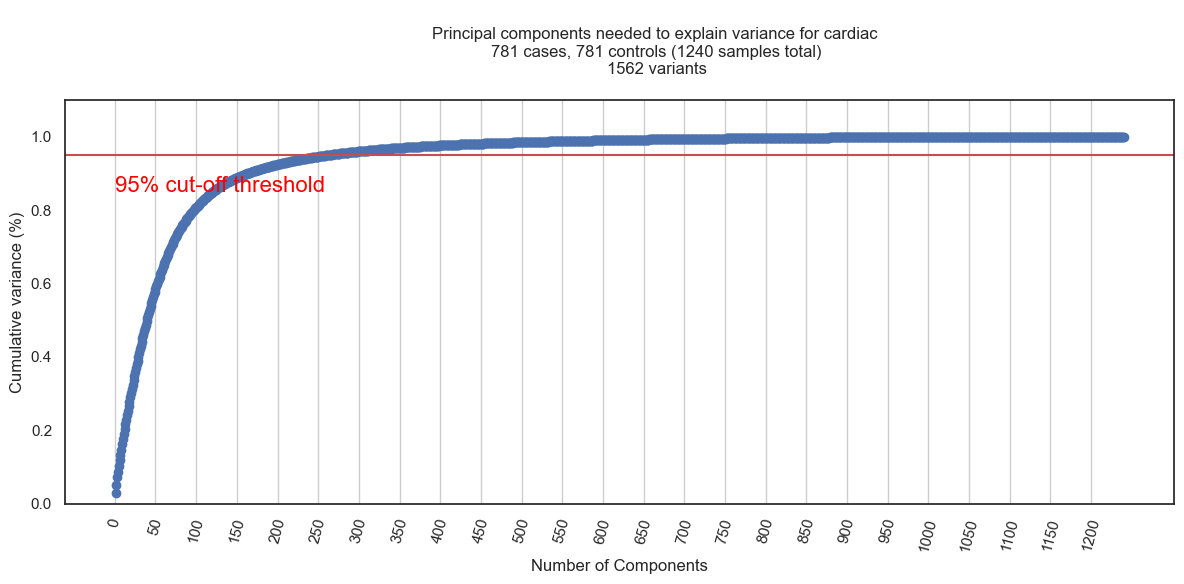

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



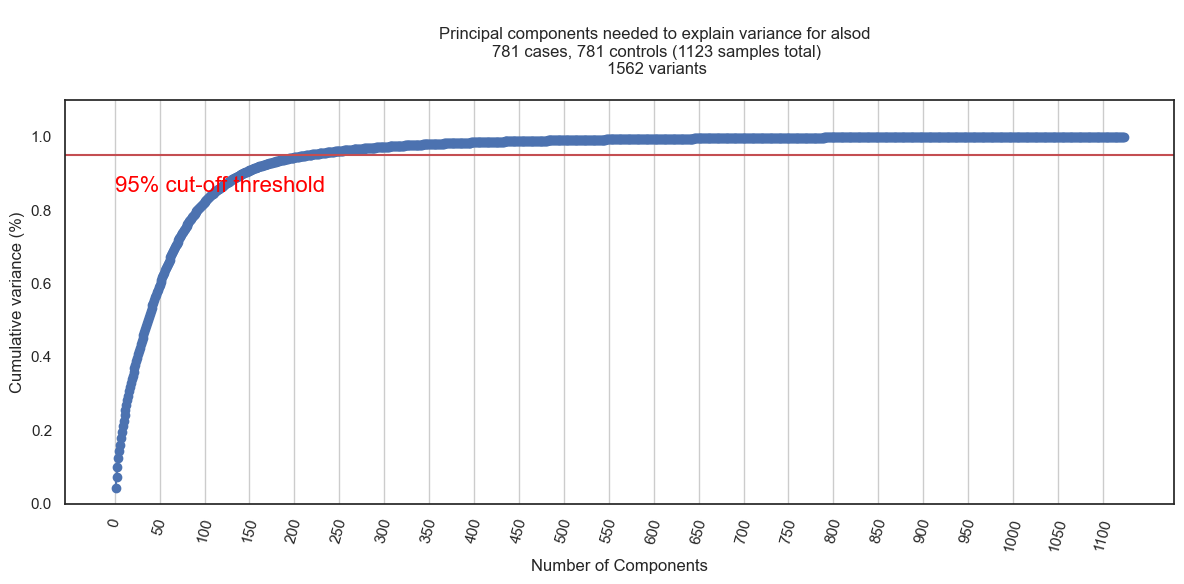

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



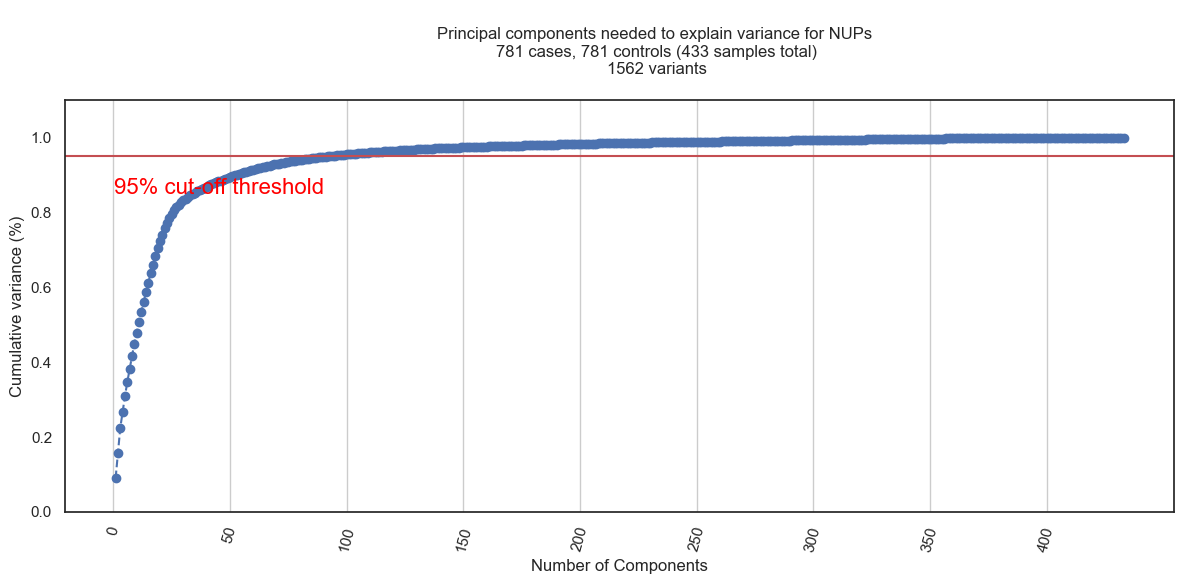

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



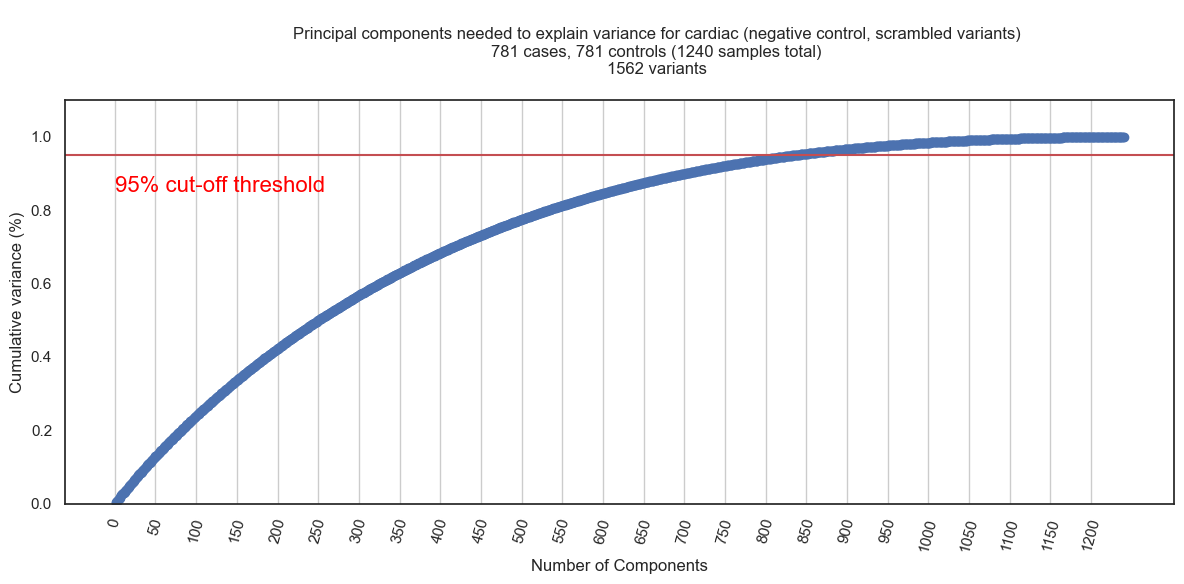

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



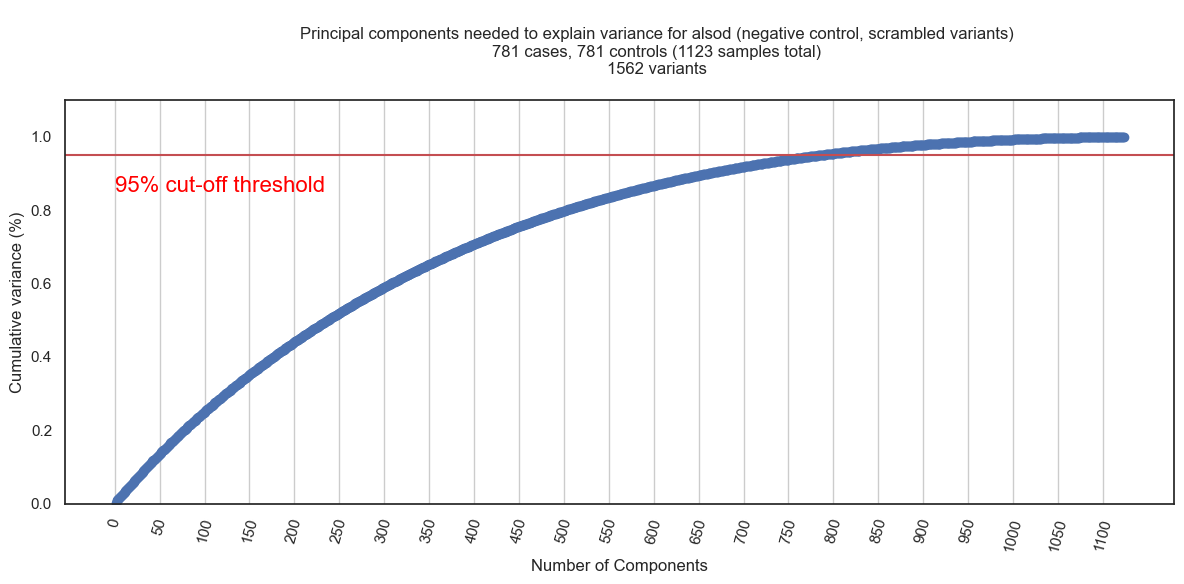

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



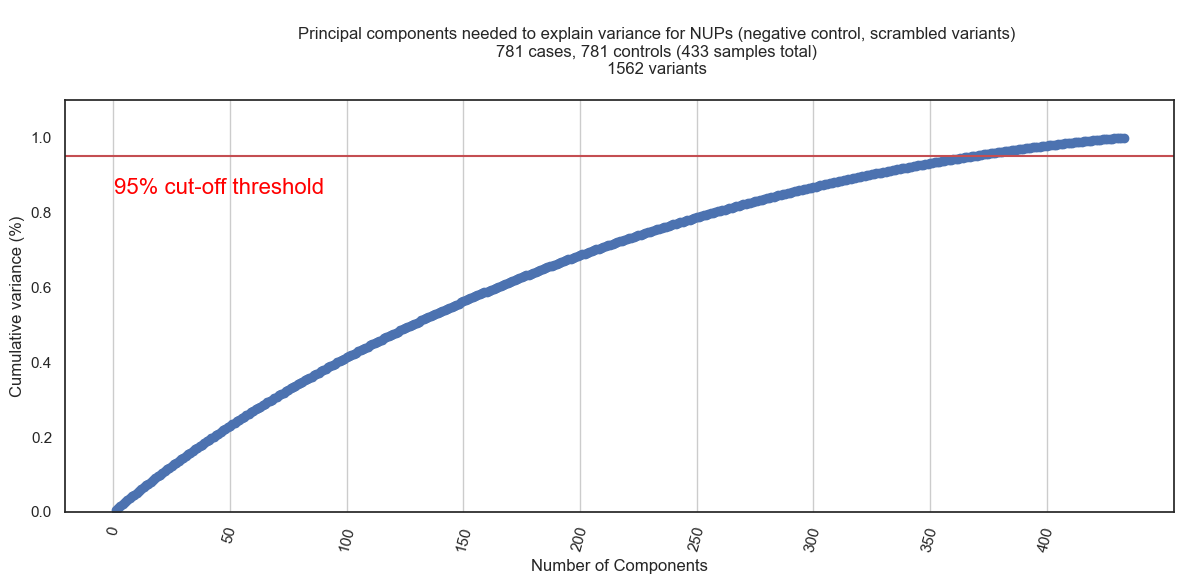

In [114]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

for type, dataframeDict in {'experimental': geneSetGenotypeDataframes, 'control': negativeControlDataframes}.items():
    for name, dataframe in dataframeDict.items():
        pca = PCA().fit(dataframe.T)

        plt.rcParams["figure.figsize"] = (12,6)

        fig, ax = plt.subplots()
        num_components = pca.n_components_  # Get the number of components
        xi = np.arange(1, num_components + 1, step=1)
        y = np.cumsum(pca.explained_variance_ratio_)

        plt.ylim(0.0,1.1)
        plt.plot(xi, y, marker='o', linestyle='--', color='b')

        plt.xlabel('Number of Components')
        plt.xticks(np.arange(0, num_components + 1, step=50)) #change from 0-based array index to 1-based human-readable label
        plt.ylabel('Cumulative variance (%)')
        plt.title(f"""
                Principal components needed to explain variance for {name} {'(negative control, scrambled variants)' if type == 'control' else ''}
                {min_sample_size} cases, {min_sample_size} controls ({len(dataframe)} samples total)
                {len(dataframe.T)} variants
                """)

        plt.axhline(y=0.95, color='r', linestyle='-')
        plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

        ax.grid(axis='x')
        ax.tick_params(axis='x',  labelrotation = 75)
        plt.tight_layout()
        plt.show()


In [86]:
pacmapEmbedder = pacmap.PaCMAP(n_components=10, n_neighbors=None)  # let neighbors be inferred — max components is 100
pcaEmbedder = PCA(n_components=250)

In [115]:
geneSetEmbeddingsPCA = {}
geneSetEmbeddingsPaCMAP = {}

for type, dataframeDict in {'experimental': geneSetGenotypeDataframes, 'control': negativeControlDataframes}.items():
   geneSetEmbeddingsPCA[type] = {}
   geneSetEmbeddingsPaCMAP[type] = {}
   for name, dataframe in dataframeDict.items():
      geneSetEmbeddingsPCA[type][name] = pcaEmbedder.fit_transform(dataframe.T)  # transpose to align samples along rows
      geneSetEmbeddingsPaCMAP[type][name] = pacmapEmbedder.fit_transform(dataframe.T)
   

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/noot/.pyenv/versions/minicond

## Determine pairwise distances for each sample

In [116]:
from scipy.spatial import distance

# Define distance functions
distance_functions = {
    'cosine': distance.cosine,
    'manhattan': distance.cityblock,
    'minkowski': distance.minkowski,
    'mahalanobis': distance.mahalanobis,
}

def compute_covariance_matrix(data):
    covariance_matrix = np.cov(data, rowvar=False)
    regularization_term = 1e-5  # Small ridge regularization constant to add to the diagonal & handle singular matrices
    regularized_matrix = covariance_matrix + np.eye(covariance_matrix.shape[0]) * regularization_term
    return np.linalg.inv(regularized_matrix)

def compute_distance(distance_type, sample_data, paired_data, inv_cov_matrix=None):
    try:
        dist_function = distance_functions[distance_type]
        if distance_type == 'mahalanobis' and inv_cov_matrix is not None:
            return dist_function(sample_data, paired_data, inv_cov_matrix)
        else:
            return dist_function(sample_data, paired_data)
    except KeyError:
        raise ValueError(f'Unknown distance type {distance_type}')

def process_sample(distance_type, sample_name, data, inv_cov_matrix=None):
    sampleIndex =  geneSetGenotypeDataframes[name].columns.get_loc(sample_name)
    return {
        paired_sample: compute_distance(distance_type, data[sampleIndex], data[pairedSampleIndex], inv_cov_matrix)
        for pairedSampleIndex, paired_sample in  enumerate(geneSetGenotypeDataframes[name].columns)
    }

In [117]:
from tqdm import tqdm
from joblib import Parallel, delayed

sampleDistanceDict = {}
distance_types = ['cosine', 'manhattan', 'mahalanobis', ] # 'mahalanobis'

for runType, dataframeDict in {'experimental': geneSetEmbeddingsPCA, 'control': geneSetEmbeddingsPCA}.items():
    sampleDistanceDict[runType] = {}
    for distance_type in tqdm(distance_types):
        if distance_type == 'mahalanobis':
            inv_cov_matrices = {name: compute_covariance_matrix(data) for name, data in geneSetEmbeddingsPCA[runType].items()}
            results = Parallel(n_jobs=-1)(delayed(process_sample)(distance_type, sample_name, data, inv_cov_matrices[name]) 
                                        for name, data in geneSetEmbeddingsPCA[runType].items() 
                                        for sample_name in geneSetGenotypeDataframes[name].columns)
        else:
            results = Parallel(n_jobs=-1)(delayed(process_sample)(distance_type, sample_name, data) 
                                        for name, data in geneSetEmbeddingsPCA[runType].items() 
                                        for sample_name in  geneSetGenotypeDataframes[name].columns)
        
        # Aggregate results into sampleDistanceDict
        aggregated_results = {}
        for name, data in geneSetEmbeddingsPCA[runType].items():
            aggregated_results[name] = {sample_name: results.pop(0) for sample_name in  geneSetGenotypeDataframes[name].columns}
        
        sampleDistanceDict[runType][distance_type] = aggregated_results

100%|██████████| 3/3 [01:29<00:00, 29.76s/it]


In [ ]:
import dash_bio

# for distance_type in sampleDistanceDict.keys():
#     for gene_set_name, gene_set_data in sampleDistanceDict[distance_type].items():
#         # Create a DataFrame from the distance data
#         distance_df = pd.DataFrame(gene_set_data)
        
#         # Ensure the distance data is symmetric and the diagonal is zero
#         for row in distance_df.index:
#             for col in distance_df.columns:
#                 distance_df.loc[row, col] = distance_df.loc[col, row] if row != col else 0
        
#         # Convert the DataFrame values to a format suitable for dash_bio.Clustergram
#         data = distance_df.values
        
#         # Render the clustergram
#         clustergram = dash_bio.Clustergram(
#             data=data,
#             column_labels=None,
#             row_labels=None,
#             row_dist="cosine",
#             col_dist="cosine",
#             height=800,
#             width=700,
#             display_ratio=[0.1, 0.7],
#             color_list={
#                 'row': ['#636EFA', '#00CC96', '#19D3F3'],
#                 'col': ['#AB63FA', '#EF553B'],
#                 'bg': '#506784'
#             },
#             line_width=2
#         )

#         clustergram.show()
        
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# TODO handle experimental vs control  
for distance_type in sampleDistanceDict.keys():
    for gene_set_name, gene_set_data in sampleDistanceDict[distance_type].items():
        # Create a DataFrame from the distance data
        distance_df = pd.DataFrame(gene_set_data)
        
        # Ensure the distance data is symmetric and the diagonal is zero
        for row in distance_df.index:
            for col in distance_df.columns:
                distance_df.loc[row, col] = distance_df.loc[col, row] if row != col else 0
        
        # Create a color mapping for your samples
        sample_colors = distance_df.columns.map(lambda x: 'red' if x in balanced_common_case_ids else 'blue')
        
        # Generate a custom colormap for the heatmap values
        cmap = sns.diverging_palette(220, 20, as_cmap=True)
        
        # Create a clustermap
        cluster_map = sns.clustermap(distance_df, method='average', cmap=cmap, row_colors=sample_colors, col_colors=sample_colors)
        
        # Remove x and y tick labels from the heatmap
        cluster_map.ax_heatmap.set_xticklabels([])
        cluster_map.ax_heatmap.set_yticklabels([])

        # Set the title
        plt.title(f"""
            PCA embedding of {gene_set_name} genes
            {distance_type.capitalize()} distance between {min_sample_size} cases and {min_sample_size} controls (European) 
            {len(geneSetGenotypeDataframes[gene_set_name].T)} total samples, {len(geneSetGenotypeDataframes[gene_set_name])} variants over 250 components""")
        
        # Create legend
        red_patch = mpatches.Patch(color='red', label='Case')
        blue_patch = mpatches.Patch(color='blue', label='Control')
        # Adjust legend location
        plt.legend(handles=[red_patch, blue_patch], bbox_to_anchor=(0, 1), loc=1, borderaxespad=0.)
        
        
        # Show the plot
        plt.show()


In [62]:
pd.DataFrame(sampleDistanceDict['experimental']["cosine"]["alsod"])

CGND-HDA-00925-b38  CGND-HDA-03094  CGND-HDA-02036  \
CGND-HDA-00925-b38            0.000000        1.103620        1.143756   
CGND-HDA-03094                1.103620        0.000000        0.972394   
CGND-HDA-02036                1.143756        0.972394        0.000000   
CGND-HDA-02655                0.886628        1.164918        0.990868   
CGND-HDA-00528-b38            0.809634        0.972278        1.062800   
...                                ...             ...             ...   
CGND-HDA-01448                1.147166        1.002796        0.810645   
CGND-HDA-01416                0.994293        0.907396        1.063383   
HG00110                       1.018403        1.044216        0.944137   
NA07037                       1.084372        0.986404        1.088120   
CGND-HDA-03548                1.033057        1.160478        0.860977   

                    CGND-HDA-02655  CGND-HDA-00528-b38  CGND-HDA-00743-b38  \
CGND-HDA-00925-b38        0.886628            0.809634            1.053823   
CGND-HDA-03094            1.164918            0.972278            0.947274   
CGND-HDA-02036            0.990868            1.062800            1.053327   
CGND-HDA-02655            0.000000            1.117323            1.066437   
CGND-HDA-00528-b38        1.117323            0.000000            0.994091   
...                            ...                 ...                 ...   
CGND-HDA-01448            0.987616            1.097341            0.986652   
CGND-HDA-01416            1.041581            0.917928            0.965666   
HG00110                   0.870032            1.227213            0.986008   
NA07037                   1.151667            0.822556            0.850997   
CGND-HDA-03548            0.817731            0.964617            1.004075   

                    CGND-HDA-02644  CGND-HDA-00662-b38  CGND-HDA-02588  \
CGND-HDA-00925-b38        0.971644            0.952127        1.009355   
CGND-HDA-03094            0.845838            1.038948        0.832704   
CGND-HDA-02036            0.962177            0.951663        1.079327   
CGND-HDA-02655            1.089919            0.991048        1.060463   
CGND-HDA-00528-b38        0.930480            1.064349        0.846821   
...                            ...                 ...             ...   
CGND-HDA-01448            1.182063            0.873538        1.081805   
CGND-HDA-01416            0.937788            0.842911        0.939241   
HG00110                   1.121804            0.864389        1.254512   
NA07037                   0.852199            1.001128        0.894006   
CGND-HDA-03548            1.164054            0.961434        1.141387   

                    CGND-HDA-01808  ...   NA20800   HG01515  CGND-HDA-03876  \
CGND-HDA-00925-b38        1.150788  ...  1.035736  0.990123        0.990840   
CGND-HDA-03094            0.913743  ...  1.096579  1.043734        0.907319   
CGND-HDA-02036            0.895457  ...  0.920987  0.954304        0.880404   
CGND-HDA-02655            1.055881  ...  1.045246  1.069658        0.882822   
CGND-HDA-00528-b38        1.095316  ...  0.838889  1.028926        0.989399   
...                            ...  ...       ...       ...             ...   
CGND-HDA-01448            0.887467  ...  0.916802  0.815893        0.842952   
CGND-HDA-01416            1.097092  ...  1.047171  1.178194        1.035046   
HG00110                   1.045589  ...  1.033200  0.768143        0.909848   
NA07037                   0.984395  ...  0.975348  1.094987        1.052520   
CGND-HDA-03548            0.867624  ...  0.896571  0.933391        0.896340   

                     NA12827   NA20801  CGND-HDA-01448  CGND-HDA-01416  \
CGND-HDA-00925-b38  0.899418  0.911237        1.147166        0.994293   
CGND-HDA-03094      1.041813  0.855890        1.002796        0.907396   
CGND-HDA-02036      0.862122  1.077744        0.810645        1.063383   
CGND-HDA-02655      0.959140  1.171516        0.987616      

In [123]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr

def compute_per_sample_correlation(matrix1, matrix2):
    correlations = []
    for sample_id in matrix1.columns:
        vector1 = matrix1[sample_id].values
        vector2 = matrix2[sample_id].values
        correlation, p_value = spearmanr(vector1, vector2)
        correlations.append(correlation)
    return correlations

def compute_correlation(distance_type, gene_set1, gene_set2, sampleDistanceDict):
    distance_matrix1 = pd.DataFrame(sampleDistanceDict[distance_type][gene_set1])
    distance_matrix2 = pd.DataFrame(sampleDistanceDict[distance_type][gene_set2])
    
    correlations = compute_per_sample_correlation(distance_matrix1, distance_matrix2)
    return gene_set1, gene_set2, correlations

correlation_results = {}

for runType in sampleDistanceDict.keys():
    correlation_results[runType] = {}
    for distance_type in sampleDistanceDict[runType].keys():
        gene_set_names = list(sampleDistanceDict[runType][distance_type].keys())
        
        for gene_set1 in gene_set_names:
            for gene_set2 in gene_set_names:
                if gene_set1 != gene_set2 and (distance_type, gene_set2, gene_set1) not in correlation_results[runType]:
                    _, _, correlations = compute_correlation(distance_type, gene_set1, gene_set2, sampleDistanceDict[runType])
                    
                    # Handle the results, e.g., store them, plot histogram, etc.
                    # For example, store in dictionary:
                    correlation_results[runType][(distance_type, gene_set1, gene_set2)] = correlations


In [125]:
import plotly.express as px
import plotly.io as pio

# Set the rendering mode to your preference (e.g., 'browser', 'notebook', 'png', etc.)
pio.renderers.default = 'notebook'

for runType in correlation_results.keys():
    # Iterate through each distance metric
    unique_distance_types = set(key[0] for key in correlation_results[runType].keys())
    for distance_type in unique_distance_types:
        
        # Collect all correlation values for this distance type
        all_correlations = []
        pair_labels = []
        for key, correlations in correlation_results[runType].items():
            if key[0] == distance_type:
                all_correlations.extend(correlations)
                pair_labels.extend([f"{key[1]} vs {key[2]}\n({len(geneSetGenotypeDataframes[key[1]])} variants vs {len(geneSetGenotypeDataframes[key[2]])} variants) " for _ in correlations])
        
        # Create DataFrame for Plotly
        df = pd.DataFrame({
            'Correlation': all_correlations,
            'Gene Set Pair': pair_labels
        })
        
        # Create and show histogram
        fig = px.histogram(df, x='Correlation', color='Gene Set Pair', nbins=100,
                        labels={'Correlation': 'Spearman Correlation'},
                        title=f"""
                        Sample correlations between {'scrambled ' if runType == 'control' else ''}gene sets for {distance_type.capitalize()} distance; {len(resolvedCaseIDs + resolvedControlIDs)} European samples""",
                        barmode='overlay',)
        fig.show()


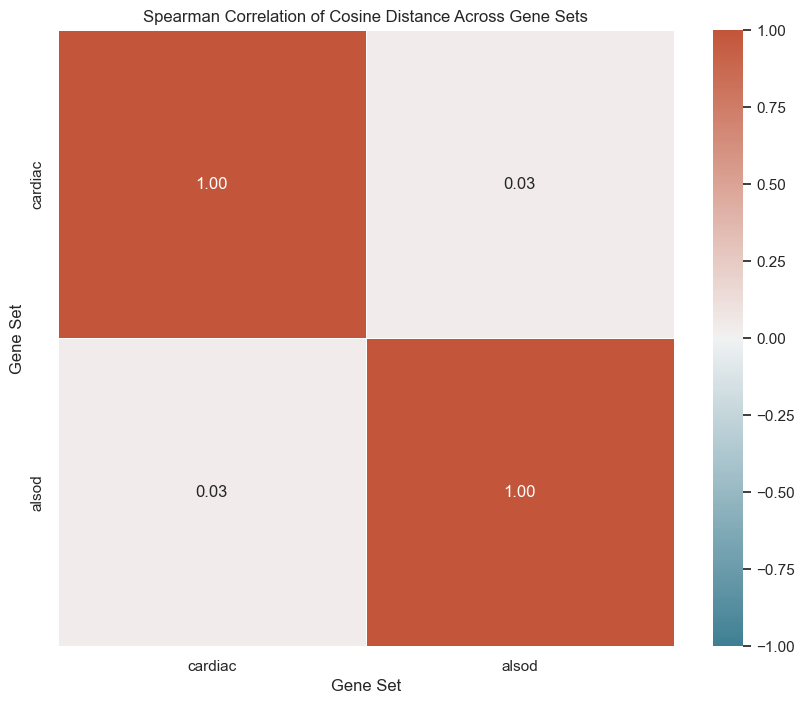

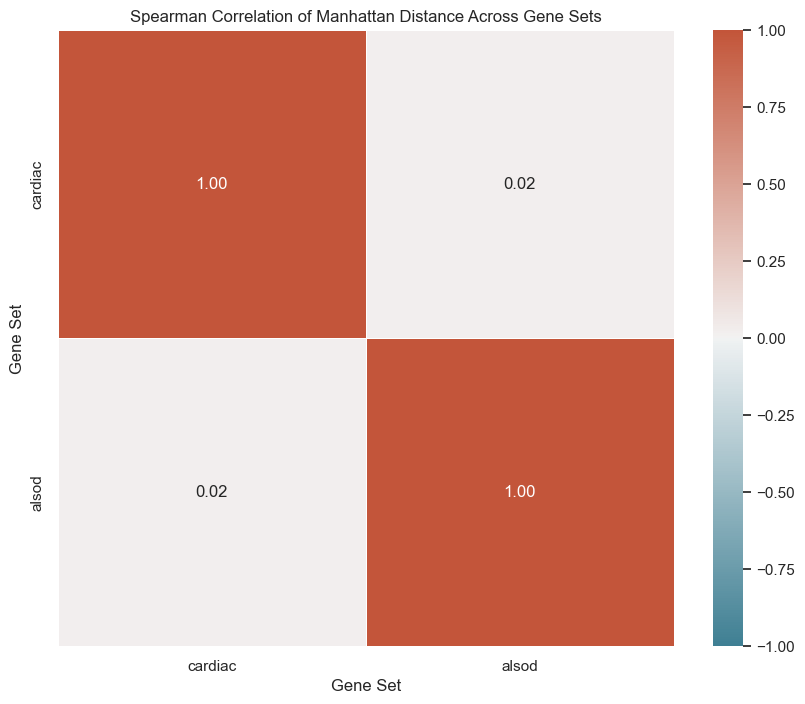

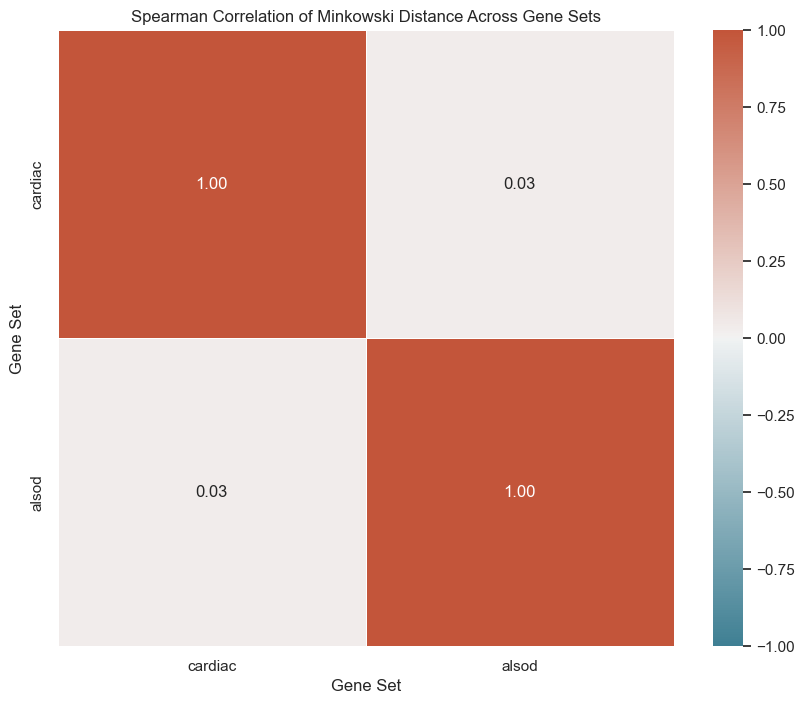

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="white")

# Loop through each distance type to create a separate heatmap
for distance_type, correlation_matrix in correlation_results.items():
    # Set up the matplotlib figure
    plt.figure(figsize=(10, 8))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(correlation_matrix.astype(float), cmap=cmap, vmax=1, vmin=-1,
                square=True, linewidths=.5, annot=True, fmt=".2f")

    # Set titles and labels
    plt.title(f'Spearman Correlation of {distance_type.capitalize()} Distance Across Gene Sets')
    plt.xlabel('Gene Set')
    plt.ylabel('Gene Set')

    # Show plot
    plt.show()
